### 필수과제3
- 과거 주가 데이터를 가지고 시계열 데이터 분석을 해주시는데, 트렌드를 보고 갑자기 상승하거나, 하락하는 경우가 있을 것
- 단순한 재무적 정보가 아니라 비재무적인 정보들도 서칭하셔서 왜 그런식의 트렌드가 반영되었는지 같이 확인하면 좋을 것
- dart 재무적정보 확인 가능, 네이버 금융기사 리서치해도 충분히 다 나온다.

In [43]:
!pip install finance-datareader

In [44]:
# import necessary libraries
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [45]:
import FinanceDataReader as fdr
fdr.StockListing('KRX')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-200,-0.28,72500,72700,71700,11694765,844353820176,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,553000,1,3000,0.55,551000,556000,548000,173743,95782869000,129402000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115200,2,-1000,-0.86,114600,115500,113200,2674318,307081354902,83865872448000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,744000,2,-4000,-0.53,748000,753000,741000,45085,33625021000,52953456000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59500,2,-1000,-1.65,60400,60400,59500,1514957,90428632500,48961758650000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,004565,KR7004561007,현대비앤지스틸우,KOSPI,,19900,2,-6100,-23.46,26000,26000,18500,35443,757937600,2186054800,109852,STK
2726,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,2,-1,-2.00,48,52,48,46609,2348443,1869203000,38147000,KNX
2727,322190,KR7322190000,베른,KONEX,일반기업부,141,1,10,7.63,147,147,113,178,23523,1258452777,8925197,KNX
2728,000547,KR7000542001,흥국화재2우B,KOSPI,,8050,2,-1430,-15.08,8590,8680,8050,30299,255843070,1236480000,153600,STK


In [46]:
naver = fdr.DataReader('035420')

In [47]:
naver

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-29,2312,2312,2312,2312,20549,NaN
2002-10-30,2587,2587,2558,2588,853638,0.119377
2002-10-31,2626,2689,2398,2459,1320880,-0.049845
2002-11-01,2520,2599,2215,2305,750761,-0.062627
2002-11-04,2285,2300,2135,2191,692165,-0.049458
...,...,...,...,...,...,...
2023-06-26,187700,191200,187600,188900,489487,0.000000
2023-06-27,188000,188000,184100,185900,877288,-0.015881
2023-06-28,187500,188100,182800,184800,717140,-0.005917


In [48]:
naver.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    1
dtype: int64

In [49]:
naver['ds'] = pd.to_datetime(naver.index)
naver['y'] = naver['Close']

In [50]:
naver

,Open,High,Low,Close,Volume,Change,ds,y
Date,,,,,,,,
2002-10-29,2312,2312,2312,2312,20549,NaN,2002-10-29,2312
2002-10-30,2587,2587,2558,2588,853638,0.119377,2002-10-30,2588
2002-10-31,2626,2689,2398,2459,1320880,-0.049845,2002-10-31,2459
2002-11-01,2520,2599,2215,2305,750761,-0.062627,2002-11-01,2305
2002-11-04,2285,2300,2135,2191,692165,-0.049458,2002-11-04,2191
...,...,...,...,...,...,...,...,...
2023-06-26,187700,191200,187600,188900,489487,0.000000,2023-06-26,188900
2023-06-27,188000,188000,184100,185900,877288,-0.015881,2023-06-27,185900
2023-06-28,187500,188100,182800,184800,717140,-0.005917,2023-06-28,184800


In [51]:
train = naver[:5083]
test = naver[5083:]

In [52]:
prophet = Prophet(growth = 'linear', holidays_prior_scale = 10.0, changepoint_prior_scale = 0.5, daily_seasonality=True)
prophet = prophet.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/v5z830ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/ktdjl0zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57702', 'data', 'file=/tmp/tmp9vabihky/v5z830ha.json', 'init=/tmp/tmp9vabihky/ktdjl0zu.json', 'output', 'file=/tmp/tmp9vabihky/prophet_modelgh7ewm3i/prophet_model-20230702065145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

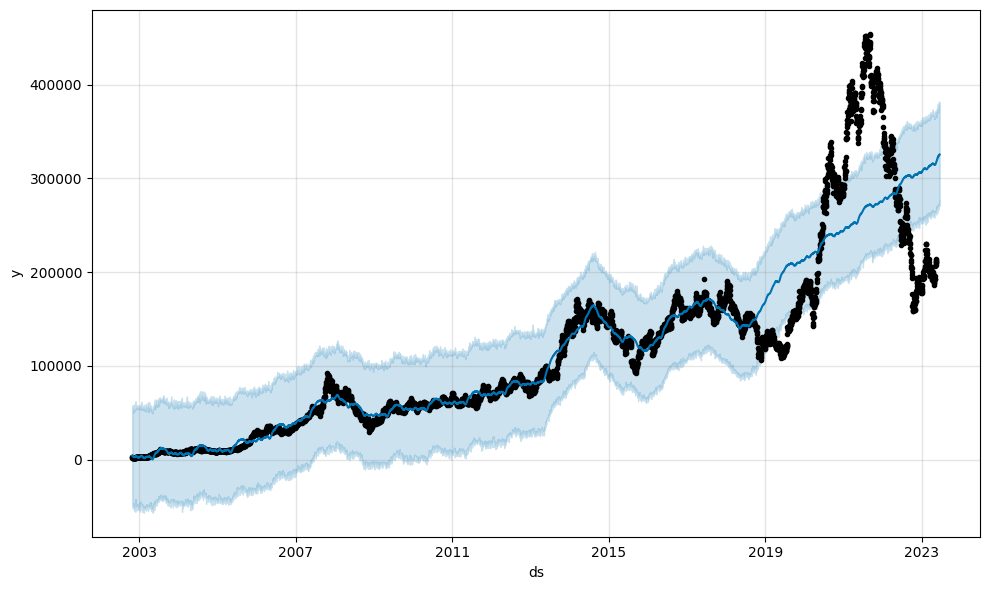

In [54]:
prophet.plot(forecast)
plt.show()

In [59]:
p_yhat = forecast[['ds','yhat']][5083:]

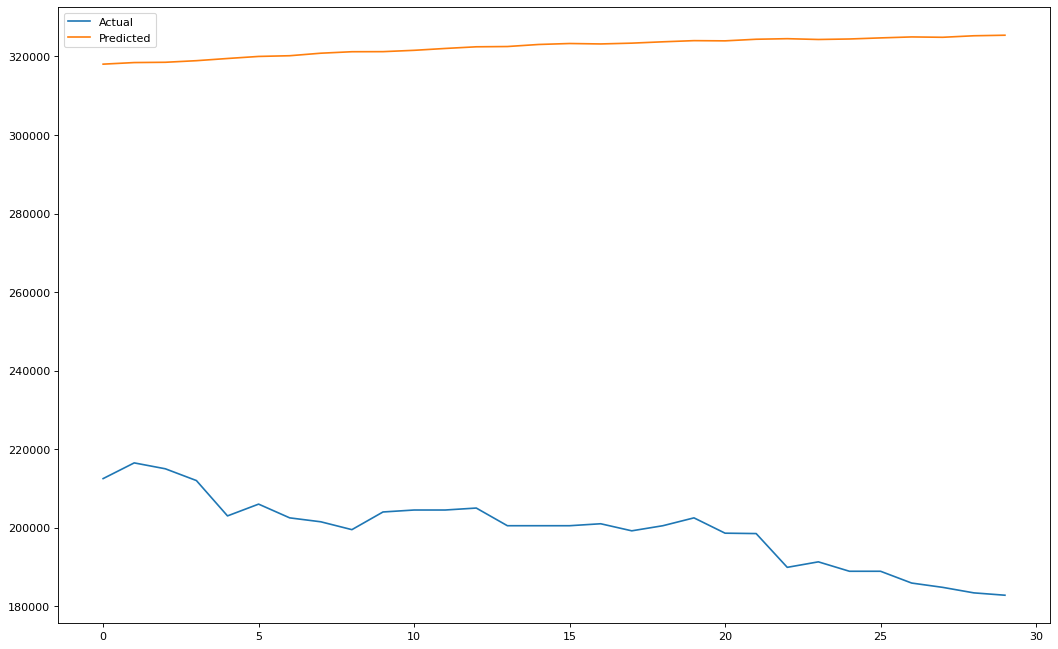

In [57]:
from matplotlib.pyplot import figure
figure(figsize=(16,10), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(p_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

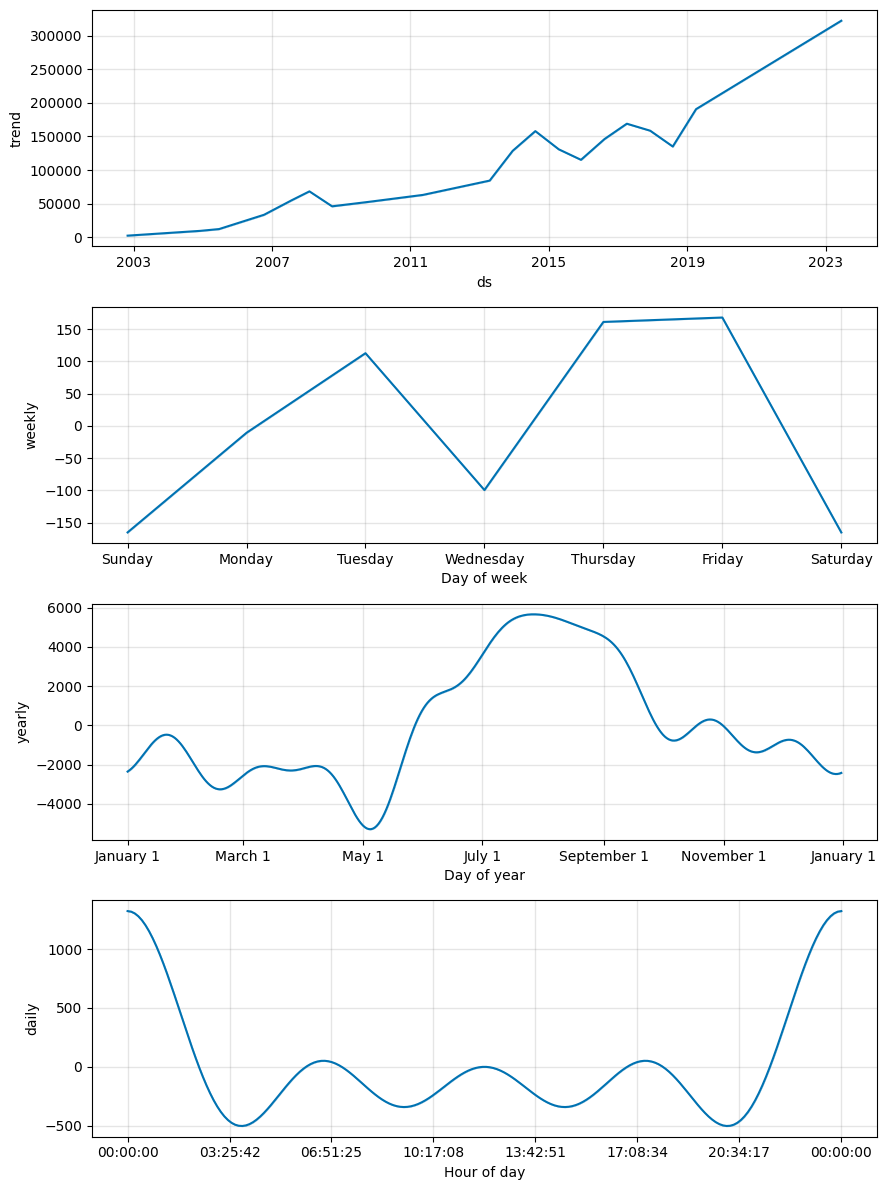

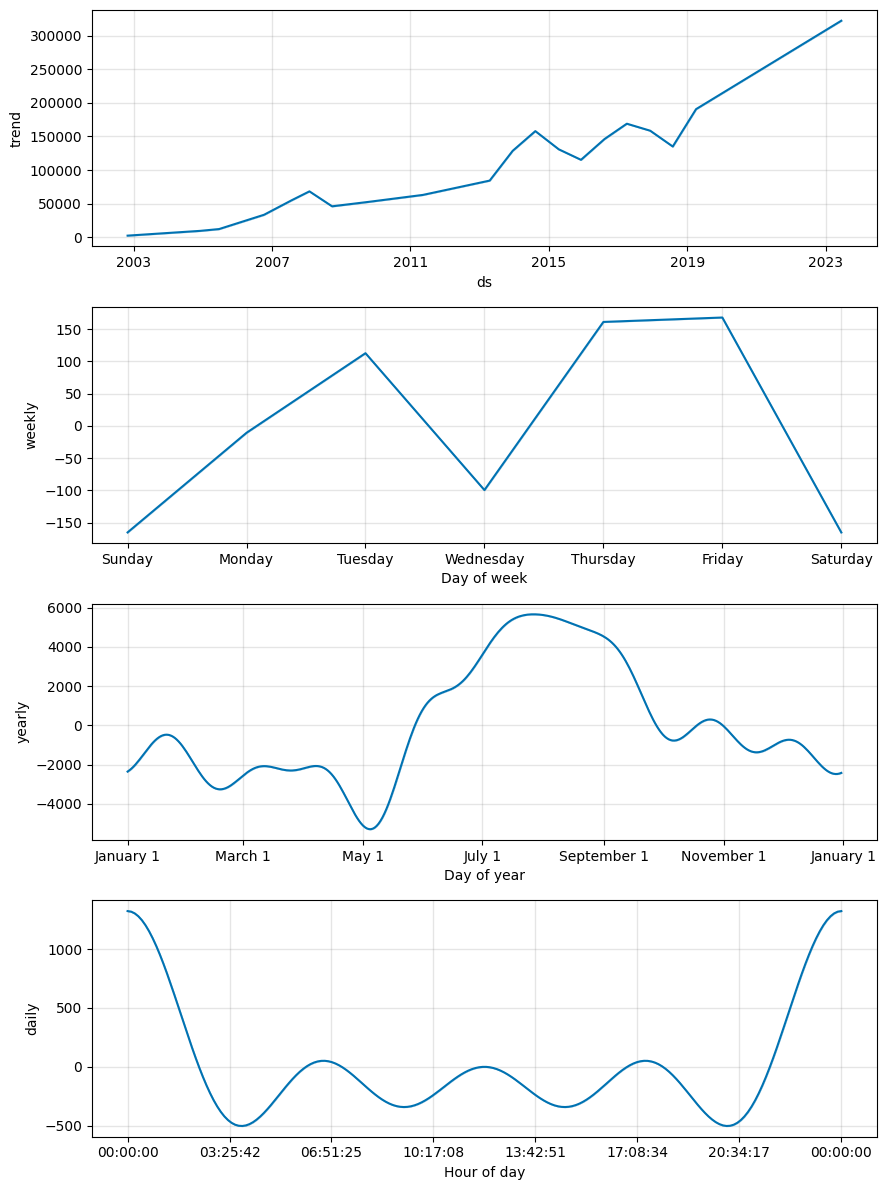

In [58]:
prophet.plot_components(forecast)

In [55]:
from sklearn.metrics import mean_squared_error
actual = test['y']
predicted = forecast['yhat'][-30:]
mae = mean_absolute_error(actual, predicted)
print("MAE:",mae)

MAE: 122966.12677579673


In [64]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='5083days',period='365days',horizon='180days')
df_cv.tail(14)

INFO:prophet:Making 7 forecasts with cutoffs between 2016-11-19 00:00:00 and 2022-11-18 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/lcp5f63u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/40yy2cih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4861', 'data', 'file=/tmp/tmp9vabihky/lcp5f63u.json', 'init=/tmp/tmp9vabihky/40yy2cih.json', 'output', 'file=/tmp/tmp9vabihky/prophet_model9d_yrwi6/prophet_model-20230702065631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:56:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/_vkqwz4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vabihky/ziyw6mdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
832,2023-04-26,394008.592914,348122.147117,439499.771717,188100,2022-11-18
833,2023-04-27,394110.274250,354899.084265,438137.759479,188200,2022-11-18
834,2023-04-28,393846.869140,347090.997199,440515.694362,192300,2022-11-18
835,2023-05-02,393729.202912,348775.847487,439832.919421,193200,2022-11-18
836,2023-05-03,393532.840337,344735.847201,441917.413198,192600,2022-11-18
837,2023-05-04,393649.633823,343370.846471,441947.619794,196100,2022-11-18
838,2023-05-08,393626.710581,346963.689616,438607.121489,207000,2022-11-18
839,2023-05-09,393612.609629,349407.837034,440670.426548,211000,2022-11-18
840,2023-05-10,393531.400457,351480.089930,441220.705315,210000,2022-11-18
841,2023-05-11,393774.689379,348047.756677,439422.825062,211000,2022-11-18


In [66]:
from prophet.diagnostics import performance_metrics
naver_p = performance_metrics(df_cv)
naver_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
157,176 days,1.314765e+10,114663.213218,97737.757646,0.442134,0.399520,0.393921,0.0
158,177 days,1.285271e+10,113369.799721,97060.081489,0.435118,0.399520,0.393238,0.0
159,178 days,1.260137e+10,112255.834368,96214.531863,0.432682,0.396787,0.394223,0.0
160,179 days,1.229042e+10,110862.179778,94919.076116,0.431651,0.396787,0.391906,0.0
161,180 days,1.203782e+10,109716.990524,93855.928419,0.426861,0.394664,0.387213,0.0


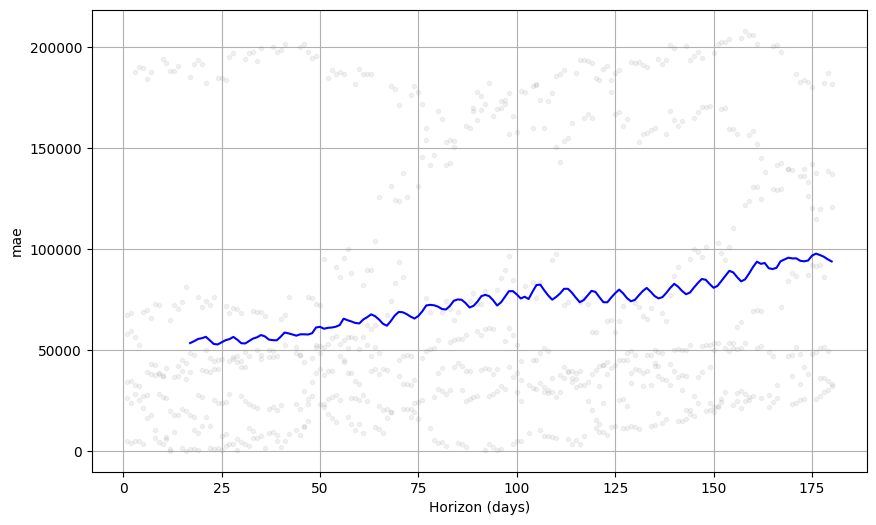

In [67]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

- 전기간 걸쳐 상승세
- 특히 코로나 기간(2020-2021) 급상세 : 나스닥지수에 크게 영향을 받는 네이버 주가는 나스닥지수가 상승함에 따라 같이 상승했으며 코로나로 인해 온라인 쇼핑이 활성화 됨으로써 라이브 커머스와 서치플랫폼(검색광고, 디스플레이 광고)의 꾸준한 성장과 함께 신사업 영역들 모두가 큰 성장세를 보였으며 왓패드 인수, 신세계·이마트와의 지분 교환, 라인(네이버의 일본 자회사)·Z홀딩스(야후재팬의 모회사) 경영통합 등 의미있는 투자와 협력의 성과로 인해 주가가 상승했다.
- 포스트 코로나 이후 급하강되며 코로나 이전 기간과 비슷해지고 있다. 그 이유로는 생성형 인공지능(AI) 경쟁 심화·성장성 둔화 등이 주가의 발목을 잡은 것으로 분석된다. 고금리와 더불어 AI 투자 열기가 세계적으로 달아오를 때 경쟁력을 확보하지 못한 영향으로 분석된다.